In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def read_slopes(filename):
    df = pd.read_csv(
        filename,
        sep='\t',
        header=None,
        names=['time', 'date', 'barcode', 'temp', 'curr_low', 'curr_high', 't_wait', 't_sample', 'slope', 'status', 'flow', 'flow2']
    )
    df = df.filter(['barcode', 'flow', 'slope'])
    return df

In [62]:
# df1 = read_slopes('Raw_Data_MMG160_batch1.csv')
# df2 = read_slopes('Raw_Data_MMG160_batch2.csv')
# df = pd.concat([df1, df2])

# df1 = read_slopes('Raw_Data_ALIMCH_61.xls')
# df2 = read_slopes('Raw_Data_ALIMCH_62.xls')

df = read_slopes('Raw_Data_ATLMMG62_avg3.xls')
df_old = read_slopes('Raw_Data_MMG160_batch1.csv')

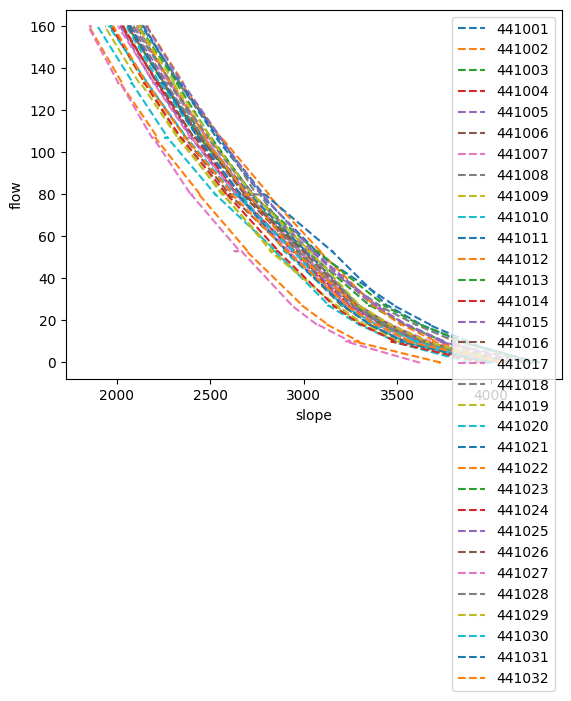

In [63]:
# params_old = [
#     444.593031,
#     -0.089325671,
#     0.000005489075,
#     -1.02226082E-10,
#     6.54127254E-16
# ]
# xx = np.linspace(0, 10000, 100)
# yy_old = [np.dot(params_old, [1, x, x**2, x**3, x**4]) for x in xx]
# plt.plot(xx, yy_old)

barcodes = [b for b in set(df['barcode'])]
for barcode in barcodes:
    df_sel = df[df.barcode == barcode]
    
    plt.plot(df_sel['slope'], df_sel['flow'], '--')
plt.xlabel('slope')
plt.ylabel('flow')
plt.legend(barcodes)

plt.show()

11.26% higher


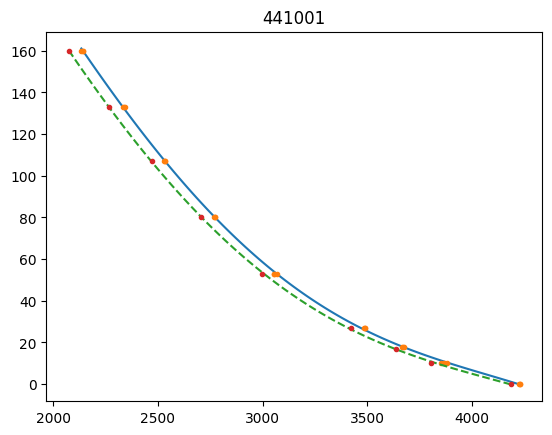

14.99% higher


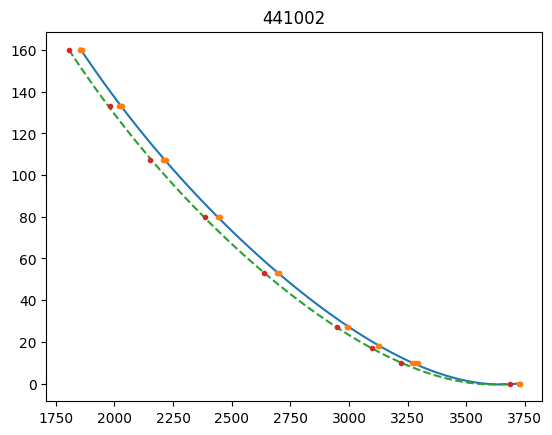

6.15% higher


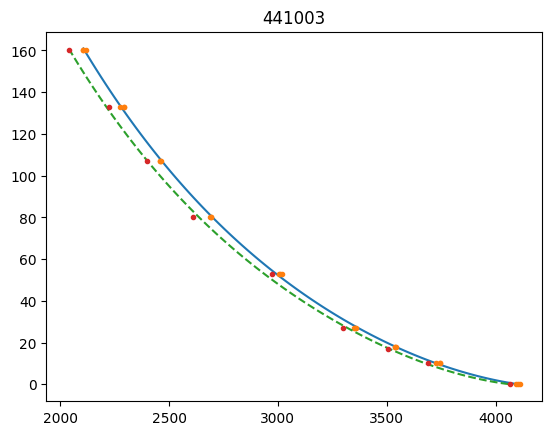

10.05% higher


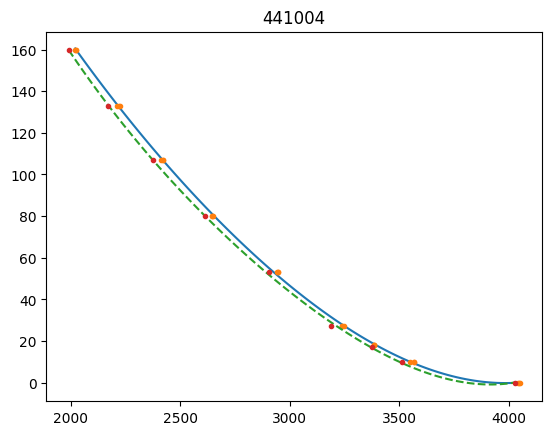

11.50% higher


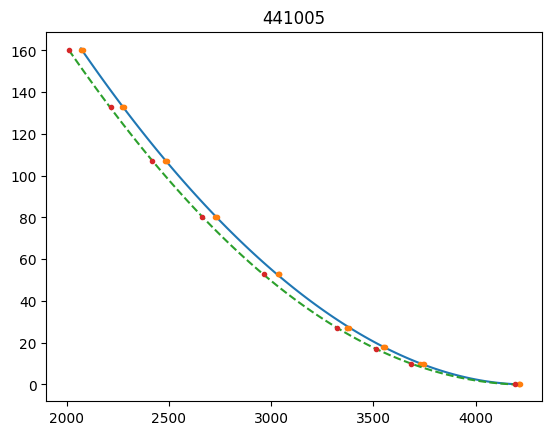

-6.10% higher


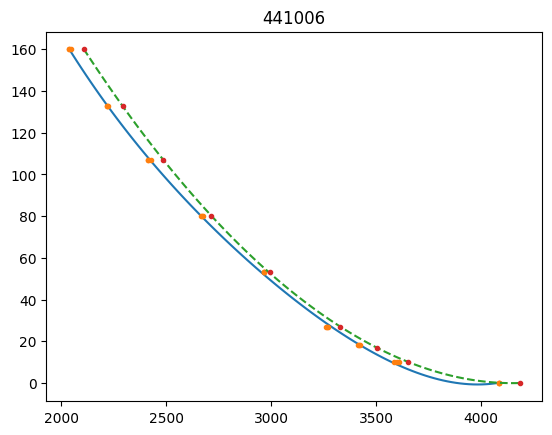

18.96% higher


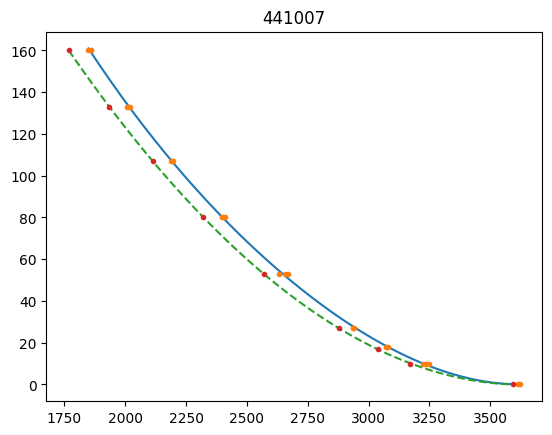

3.22% higher


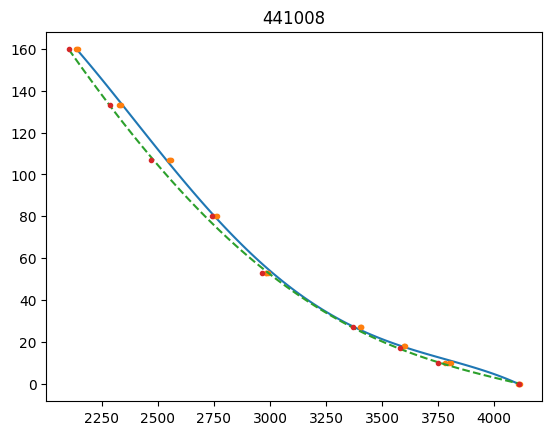

11.22% higher


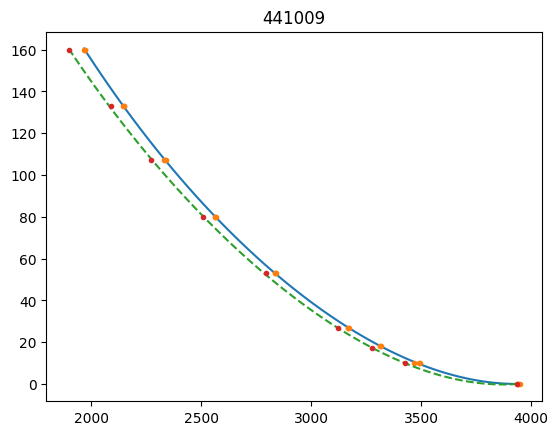

10.74% higher


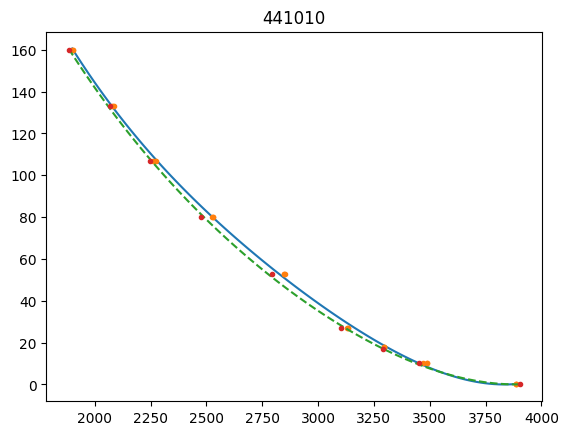

10.11% higher


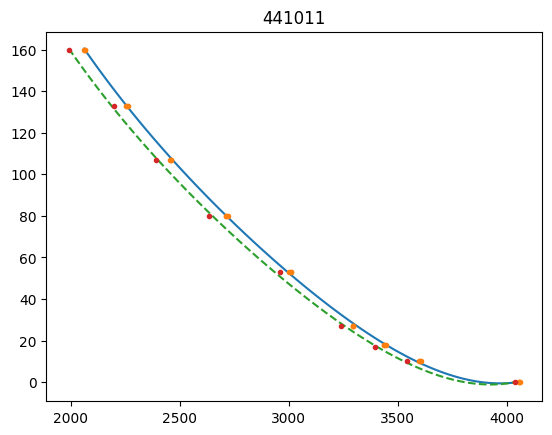

6.99% higher


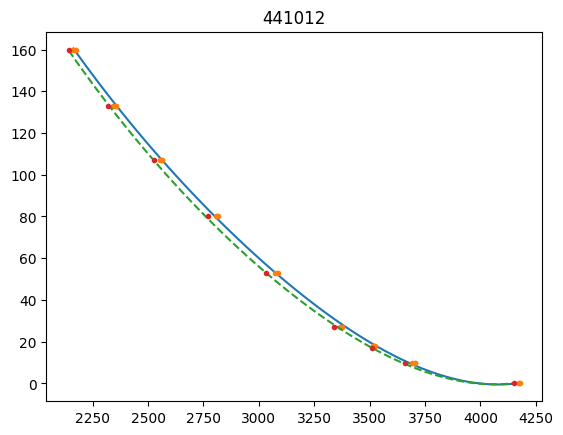

18.34% higher


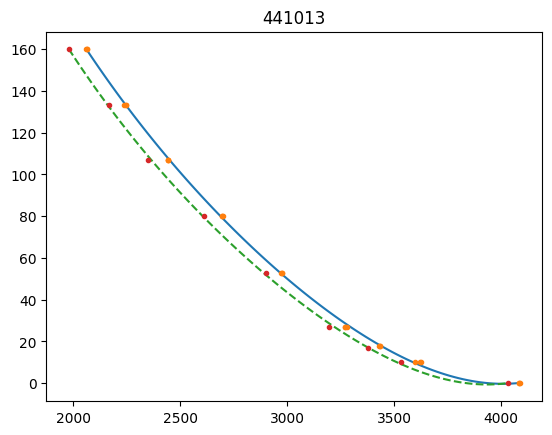

12.80% higher


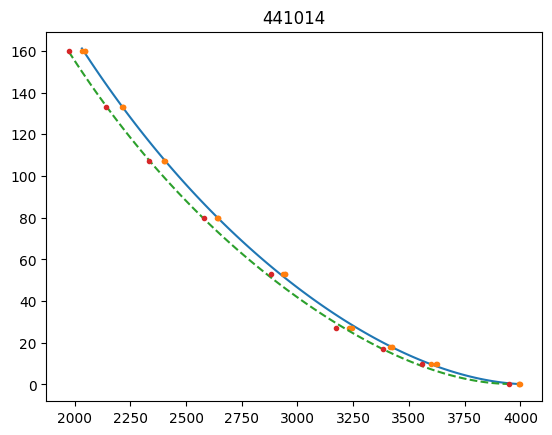

14.35% higher


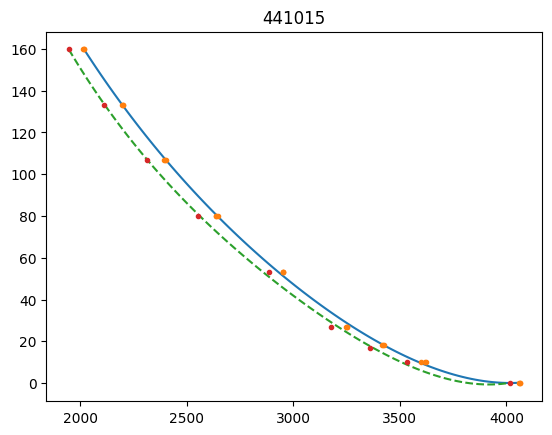

11.73% higher


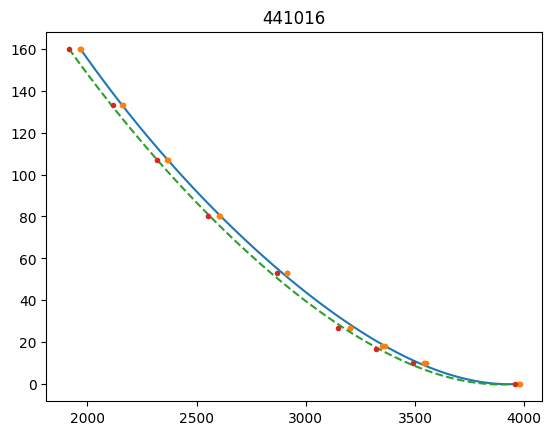

13.97% higher


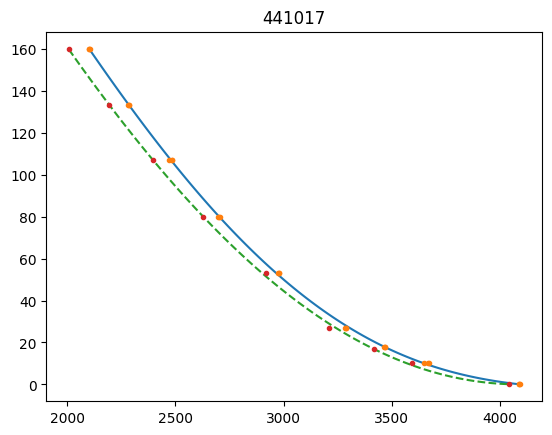

11.94% higher


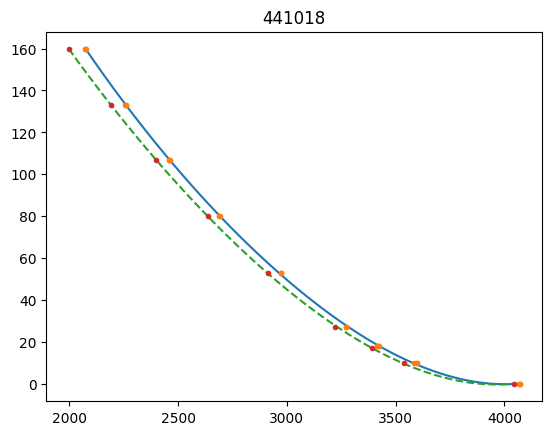

13.67% higher


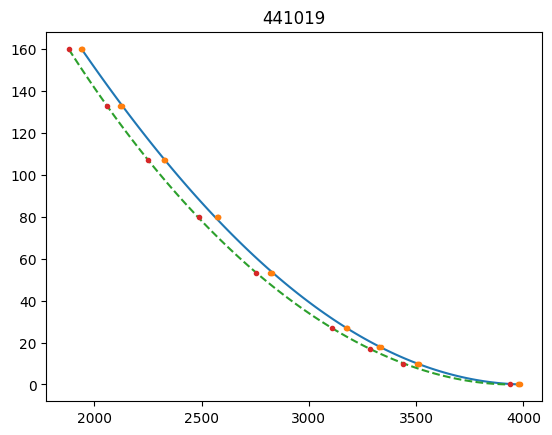

0.52% higher


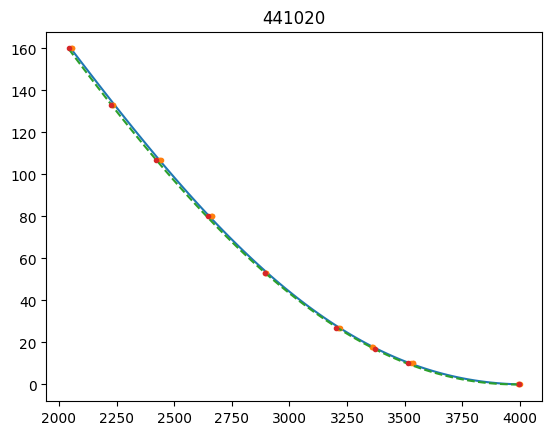

7.07% higher


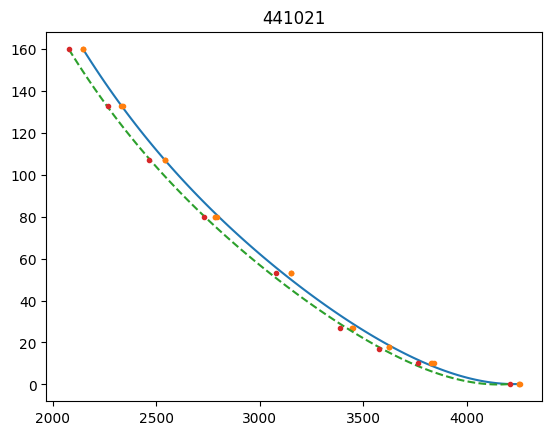

5.68% higher


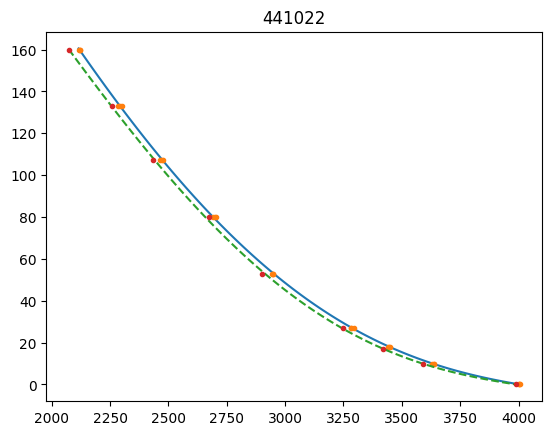

9.62% higher


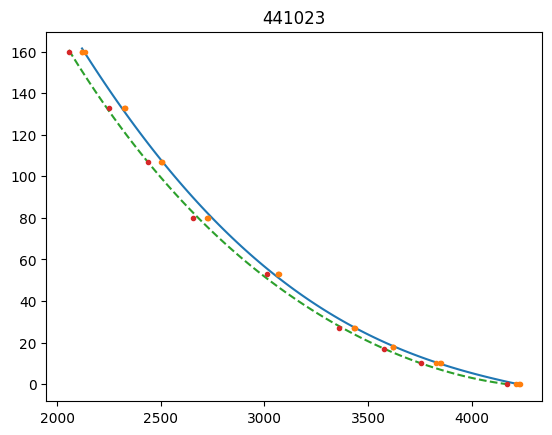

6.22% higher


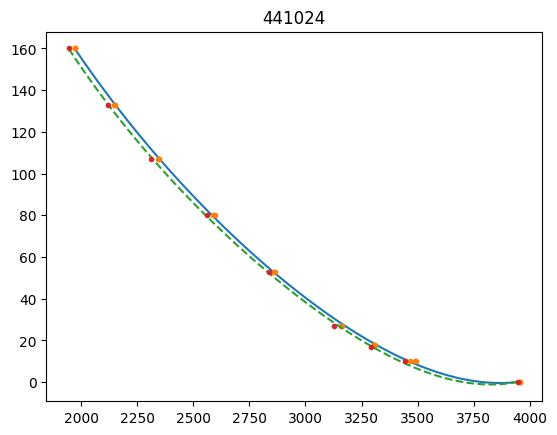

11.56% higher


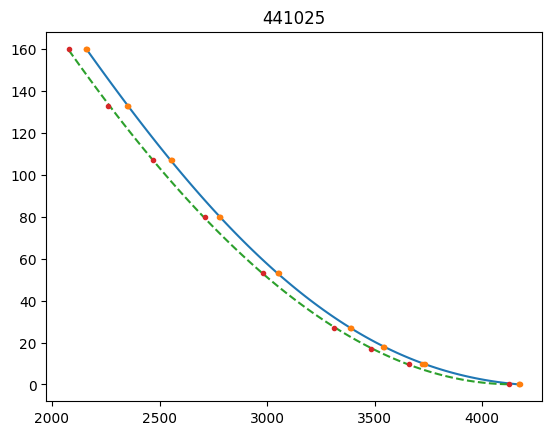

6.93% higher


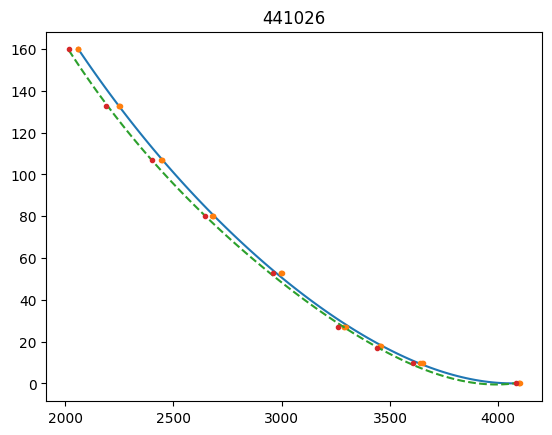

9.46% higher


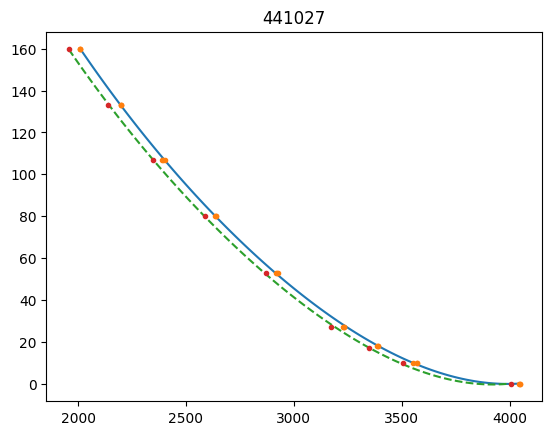

9.79% higher


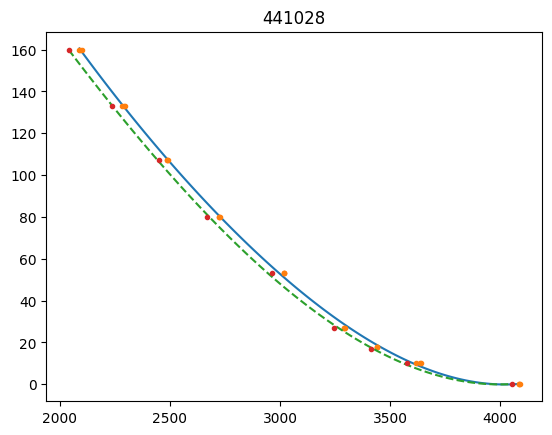

14.81% higher


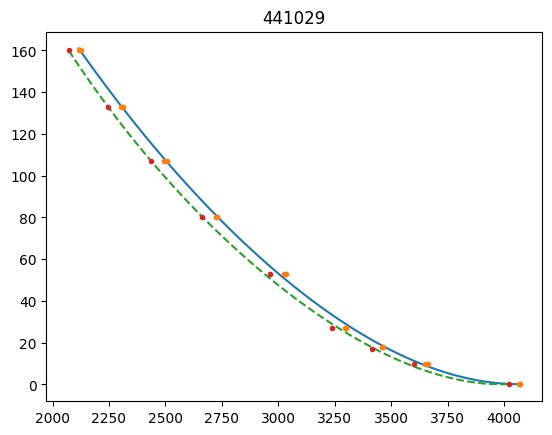

7.76% higher


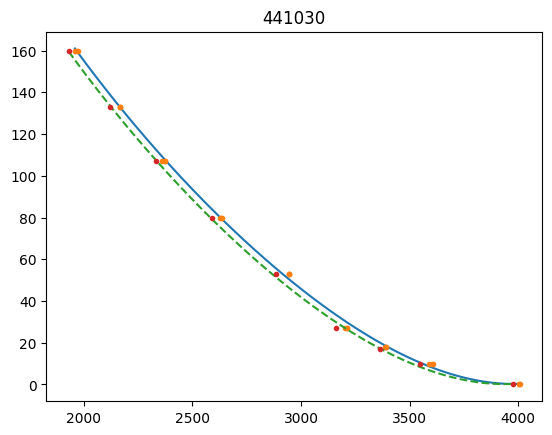

19.42% higher


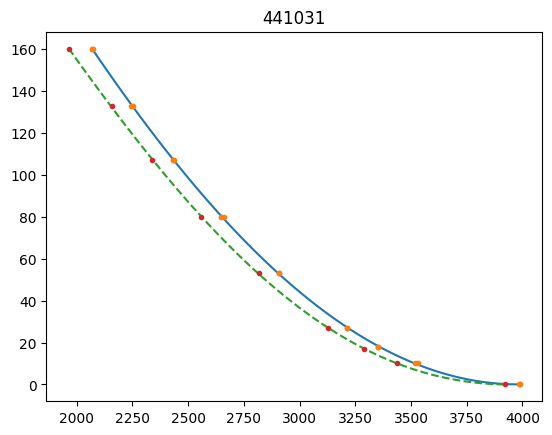

10.00% higher


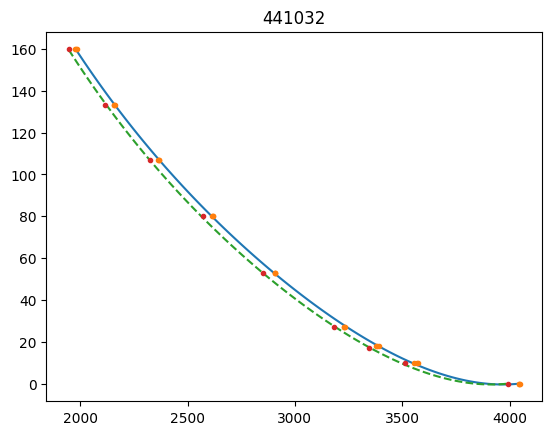

1.101484975707528


In [64]:
temp = 0

calib_params = dict()
for barcode in set(df['barcode']):
    df_sel = df[df.barcode == barcode]
    
    # flows_corrected = [v*0.962 for v in df_sel['flow']]
    # params = np.polynomial.polynomial.polyfit(df_sel['slope'], flows_corrected, 4)
    # calib_params[barcode] = params
    # xx = np.linspace(min(df_sel['slope']), max(df_sel['slope']), 100)
    # yy = [np.dot(params, [1, x, x**2, x**3, x**4]) for x in xx]
    # plt.plot(xx, yy)
    # [v*.1 for v in df_sel['flow']]
    # plt.plot(df_sel['slope'], flows_corrected, '.')
    # plt.title(barcode)
    # plt.show()
    
    params = np.polynomial.polynomial.polyfit(df_sel['slope'], df_sel['flow'], 4)
    calib_params[barcode] = params
    xx = np.linspace(min(df_sel['slope']), max(df_sel['slope']), 100)
    yy = [np.dot(params, [1, x, x**2, x**3, x**4]) for x in xx]
    plt.plot(xx, yy)
    
    plt.plot(df_sel['slope'], df_sel['flow'], '.')
    plt.title(barcode)
    
    for i in range(len(xx)):
        if xx[i] > 3000:
            break
    y_new = yy[i]
    df_sel = df_old[df_old.barcode == barcode]
    params = np.polynomial.polynomial.polyfit(df_sel['slope'], df_sel['flow'], 4)
    calib_params[barcode] = params
    xx = np.linspace(min(df_sel['slope']), max(df_sel['slope']), 100)
    yy = [np.dot(params, [1, x, x**2, x**3, x**4]) for x in xx]
    plt.plot(xx, yy, '--')
    plt.plot(df_sel['slope'], df_sel['flow'], '.')
    
    for i in range(len(xx)):
        if xx[i] > 3000:
            break
    print('{:.2f}% higher'.format((y_new/yy[i]-1)*100))
    temp += y_new/yy[i]
    
    plt.show()
    
print(temp/32)

In [65]:
# for k, v in calib_params.items():
#     print(k)
#     print(int(df[(df.barcode == k) & (df.flow==0)].slope))
#     for e in v:
#         print(e)
#     print()

In [66]:
import csv
with open('new_calib_constants.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow([
        'ID', 'CellID',
        'low_x0', 'low_x1', 'low_x2', 'low_x3', 'low_x4',
        'low_ZeroFlowSlope',
        'low_minFlow','low_maxFlow',
        'high_x0', 'high_x1', 'high_x2', 'high_x3', 'high_x4',
        'high_ZeroFlowSlope',
        'high_minFlow', 'high_maxFlow',
        'DateTimeStamp',
        'CalibrationGas'
    ])
    
    for k, v in calib_params.items():
        spamwriter.writerow([
            0, k,
            v[0], v[1], v[2], v[3], v[4],
            int(df[(df.barcode == k) & (df.flow==0)].slope),
            0, 160,
            0, 0, 0, 0, 0,
            -1,
            -1, -1,
            '23/01/2024 12:00:00',
            '93Ar7CO2'
        ])

TypeError: cannot convert the series to <class 'int'>